<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

### Jessica Witzler Costacurta || RM99068
### Marcio Hitoshi Tahyra || RM552511
### Julia Leite Galvão || RM550201
### Aline Fernandes Zeppelini || RM97966
### Camilly Breitbach Ishida || RM551474


# Relação entre Diabetes e Fatores de Saúde

## Bibliotecas e csv

**Fazendo a instalação das bibliotecas**

In [2]:
!pip install vega_datasets
from vega_datasets import data
!pip install hvplot
import hvplot.pandas
import xarray as xr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 2.8 MB/s eta 0:00:00


**Fazendo a instalação das bibliotecas**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**Carregando o csv no dataframe e renomeando as colunas**

In [4]:
diabetes = pd.read_csv('Diabetes.csv')

In [5]:
nomes_colunas = [
    "Diabetes_012", "PressaoAlta", "ColesterolAlto", "VerificacaoColesterol", "IMC", "Fumante",
    "AVC", "DoencaCardiacaouAtaque", "AtividadeFisica", "Frutas", "Vegetais",
    "ConsumoAlcoolPesado", "QualquerAtendimentoMedico", "SemMedicoCusto",
    "SaudeGeral", "SaudeMental", "SaudeFisica", "DificuldadeCaminhar",
    "Sexo", "Idade", "Educacao", "Renda"
]

diabetes.columns = nomes_colunas
diabetes.head()

,Diabetes_012,PressaoAlta,ColesterolAlto,VerificacaoColesterol,IMC,Fumante,AVC,DoencaCardiacaouAtaque,AtividadeFisica,Frutas,...,QualquerAtendimentoMedico,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificuldadeCaminhar,Sexo,Idade,Educacao,Renda
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Análise, limpeza e formatação de dados

**Verificando os valores ausentes**

In [ ]:
# Verificar valores ausentes
valores_ausentes = diabetes.isnull().sum()

print("Quantidade de valores ausentes por coluna:")
print(valores_ausentes)

Quantidade de valores ausentes por coluna:
Diabetes_012                 0
PressaoAlta                  0
ColesterolAlto               0
VerificacaoColesterol        0
IMC                          0
Fumante                      0
AVC                          0
DoencaCardiacaouAtaque       0
AtividadeFisica              0
Frutas                       0
Vegetais                     0
ConsumoAlcoolPesado          0
QualquerAtendimentoMedico    0
SemMedicoCusto               0
SaudeGeral                   0
SaudeMental                  0
SaudeFisica                  0
DificuldadeCaminhar          0
Sexo                         0
Idade                        0
Educacao                     0
Renda                        0
dtype: int64


Como não há valores ausentes/nulos nas colunas, não precisamos fazer a correção dos dados.


**Verificando valores iguais e renomeando caso estejam duplicados**

In [ ]:
def corrigir_nomes_colunas(diabetes):
    nomes_corrigidos = {}

    for nome in diabetes.columns:
        # Se o nome já está no dicionário, adicionar um sufixo
        if nome in nomes_corrigidos:
            contador = 1
            novo_nome = f"{nome}_{contador}"
            while novo_nome in nomes_corrigidos:
                contador += 1
                novo_nome = f"{nome}_{contador}"
            nomes_corrigidos[nome] = novo_nome
        else:
            nomes_corrigidos[nome] = nome

    # Renomear as colunas
    diabetes.rename(columns=nomes_corrigidos, inplace=True)

# Corrige os nomes
corrigir_nomes_colunas(diabetes)

print("Novos nomes das colunas:")
print(diabetes.columns.tolist())


Novos nomes das colunas:
['Diabetes_012', 'PressaoAlta', 'ColesterolAlto', 'VerificacaoColesterol', 'IMC', 'Fumante', 'AVC', 'DoencaCardiacaouAtaque', 'AtividadeFisica', 'Frutas', 'Vegetais', 'ConsumoAlcoolPesado', 'QualquerAtendimentoMedico', 'SemMedicoCusto', 'SaudeGeral', 'SaudeMental', 'SaudeFisica', 'DificuldadeCaminhar', 'Sexo', 'Idade', 'Educacao', 'Renda']


Criamos uma função para que, caso os nomes das colunas sejam parecidos ou iguais, ele irá adicionar um sufixo, evitando assim a existência de duplicatas.

## Estatística Descritiva das Variáveis

**Verificando tipos e separando variáveis**

In [6]:
# Verificando as tipos de variáveis

tipos_variaveis = diabetes.dtypes

# Separando as variáveis
variaveis_continuas = tipos_variaveis[tipos_variaveis != 'object'].index.tolist()
variaveis_categoricas = tipos_variaveis[tipos_variaveis == 'object'].index.tolist()

print("Variáveis Numéricas:", variaveis_continuas)
print("Variáveis Categóricas:", variaveis_categoricas)


Variáveis Numéricas: ['Diabetes_012', 'PressaoAlta', 'ColesterolAlto', 'VerificacaoColesterol', 'IMC', 'Fumante', 'AVC', 'DoencaCardiacaouAtaque', 'AtividadeFisica', 'Frutas', 'Vegetais', 'ConsumoAlcoolPesado', 'QualquerAtendimentoMedico', 'SemMedicoCusto', 'SaudeGeral', 'SaudeMental', 'SaudeFisica', 'DificuldadeCaminhar', 'Sexo', 'Idade', 'Educacao', 'Renda']
Variáveis Categóricas: []


Podemos ver aqui que, por mais que tenhamos variáveis do tipo categórica, já que muitas são representadas por "sim ou não", elas ainda são foram mostradas como números.

Por conta disso, todas as variáveis estão sendo colocadas como numéricas.

**Buscando a descrição das variáveis**

In [7]:
diabetes.describe()

,Diabetes_012,PressaoAlta,ColesterolAlto,VerificacaoColesterol,IMC,Fumante,AVC,DoencaCardiacaouAtaque,AtividadeFisica,Frutas,...,QualquerAtendimentoMedico,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificuldadeCaminhar,Sexo,Idade,Educacao,Renda
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Descrição das variáveis.

**Buscando a descrição apenas de Diabetes**

In [8]:
diabetes.Diabetes_012.describe()

,Diabetes_012
count,253680.000000
mean,0.296921
std,0.698160
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


Descrição das variáveis dos tipos de Diabetes.

**Pedindo amostras de variáveis**

In [9]:
diabetes.sample(5)

,Diabetes_012,PressaoAlta,ColesterolAlto,VerificacaoColesterol,IMC,Fumante,AVC,DoencaCardiacaouAtaque,AtividadeFisica,Frutas,...,QualquerAtendimentoMedico,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificuldadeCaminhar,Sexo,Idade,Educacao,Renda
191821,0.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,7.0,6.0,5.0
201869,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,6.0,6.0
27749,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,8.0
107996,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,30.0,0.0,1.0,6.0,5.0,1.0
192710,0.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,4.0


Pedimos para gerar 5 amostras de variáveis aleatórias com seus respectivos valores.

**Buscando as informações sobre as variáveis (categóricas ou numéricas)**

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Diabetes_012               253680 non-null  float64
 1   PressaoAlta                253680 non-null  float64
 2   ColesterolAlto             253680 non-null  float64
 3   VerificacaoColesterol      253680 non-null  float64
 4   IMC                        253680 non-null  float64
 5   Fumante                    253680 non-null  float64
 6   AVC                        253680 non-null  float64
 7   DoencaCardiacaouAtaque     253680 non-null  float64
 8   AtividadeFisica            253680 non-null  float64
 9   Frutas                     253680 non-null  float64
 10  Vegetais                   253680 non-null  float64
 11  ConsumoAlcoolPesado        253680 non-null  float64
 12  QualquerAtendimentoMedico  253680 non-null  float64
 13  SemMedicoCusto             25

Aqui, podemos ver que todas as variáveis são numéricas (float).

Por mais que tenhamos valores que logicamente sejam considerados categóricos, vamos mantê-los numéricos.  

## Matriz de correlação

**Gráfico de Matriz de Correlação**

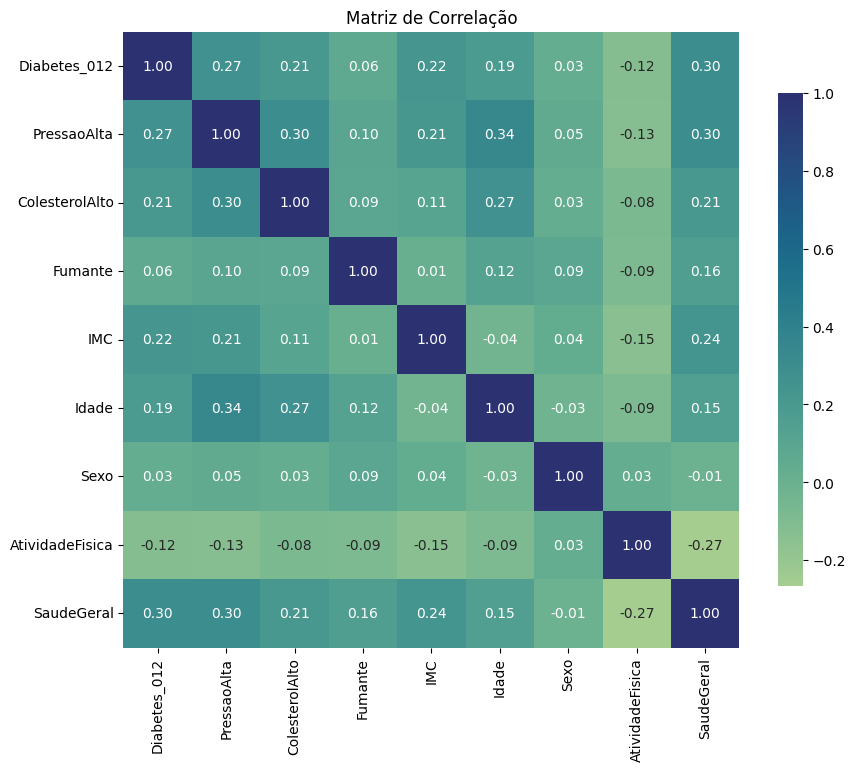

In [11]:
colunas_desejadas = [
    "Diabetes_012", "PressaoAlta", "ColesterolAlto", "Fumante", "IMC",
    "Idade", "Sexo", "AtividadeFisica", "SaudeGeral"
]

diabetes_filtrado = diabetes[colunas_desejadas]

# Calculando a matriz de correlação para os dados filtrados
correlation_matrix = diabetes_filtrado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest", square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação')
plt.show()

**Diabetes_012 e PressaoAlta (Correlação = 0.27):**

Existe uma correlação positiva moderada entre a presença de diabetes e hipertensão (pressão alta). Isso sugere que indivíduos com diabetes têm maior probabilidade de ter pressão alta, embora a correlação não seja extremamente forte.

**Diabetes_012 e ColesterolAlto (Correlação = 0.21):**

A correlação entre diabetes e colesterol alto também é moderada e positiva. Indica que pessoas com diabetes podem estar mais propensas a ter colesterol alto, mas a relação não é muito forte.

**Diabetes_012 e IMC (Correlação = 0.22):**

O índice de massa corporal (IMC) está positivamente correlacionado com a presença de diabetes. Isso sugere que um IMC mais alto pode estar relacionado ao aumento das chances de desenvolver diabetes.

**Diabetes_012 e SaudeGeral (Correlação = 0.30):**

Esta é uma das correlações mais fortes da matriz. Uma correlação positiva de 0.30 entre diabetes e saúde geral indica que pessoas com diabetes relatam pior saúde geral, o que faz sentido, considerando os impactos do diabetes na saúde como um todo.

**AtividadeFisica e SaudeGeral (Correlação = -0.27):**

Existe uma correlação negativa moderada entre a prática de atividade física e a saúde geral. Isso significa que aqueles que fazem mais atividades físicas tendem a relatar uma melhor saúde geral.

**AtividadeFisica e IMC (Correlação = -0.15):**

A atividade física tem uma correlação negativa com o IMC, o que sugere que pessoas fisicamente ativas tendem a ter um IMC mais baixo, embora a correlação seja baixa.

**Idade e PressaoAlta (Correlação = 0.34):**

A correlação mais forte observada é entre idade e pressão alta. Isso indica que conforme a idade avança, há uma maior probabilidade de se desenvolver hipertensão.

## Distribuição e inter-relacionamentos entre variáveis

**Distribuição das variáveis**

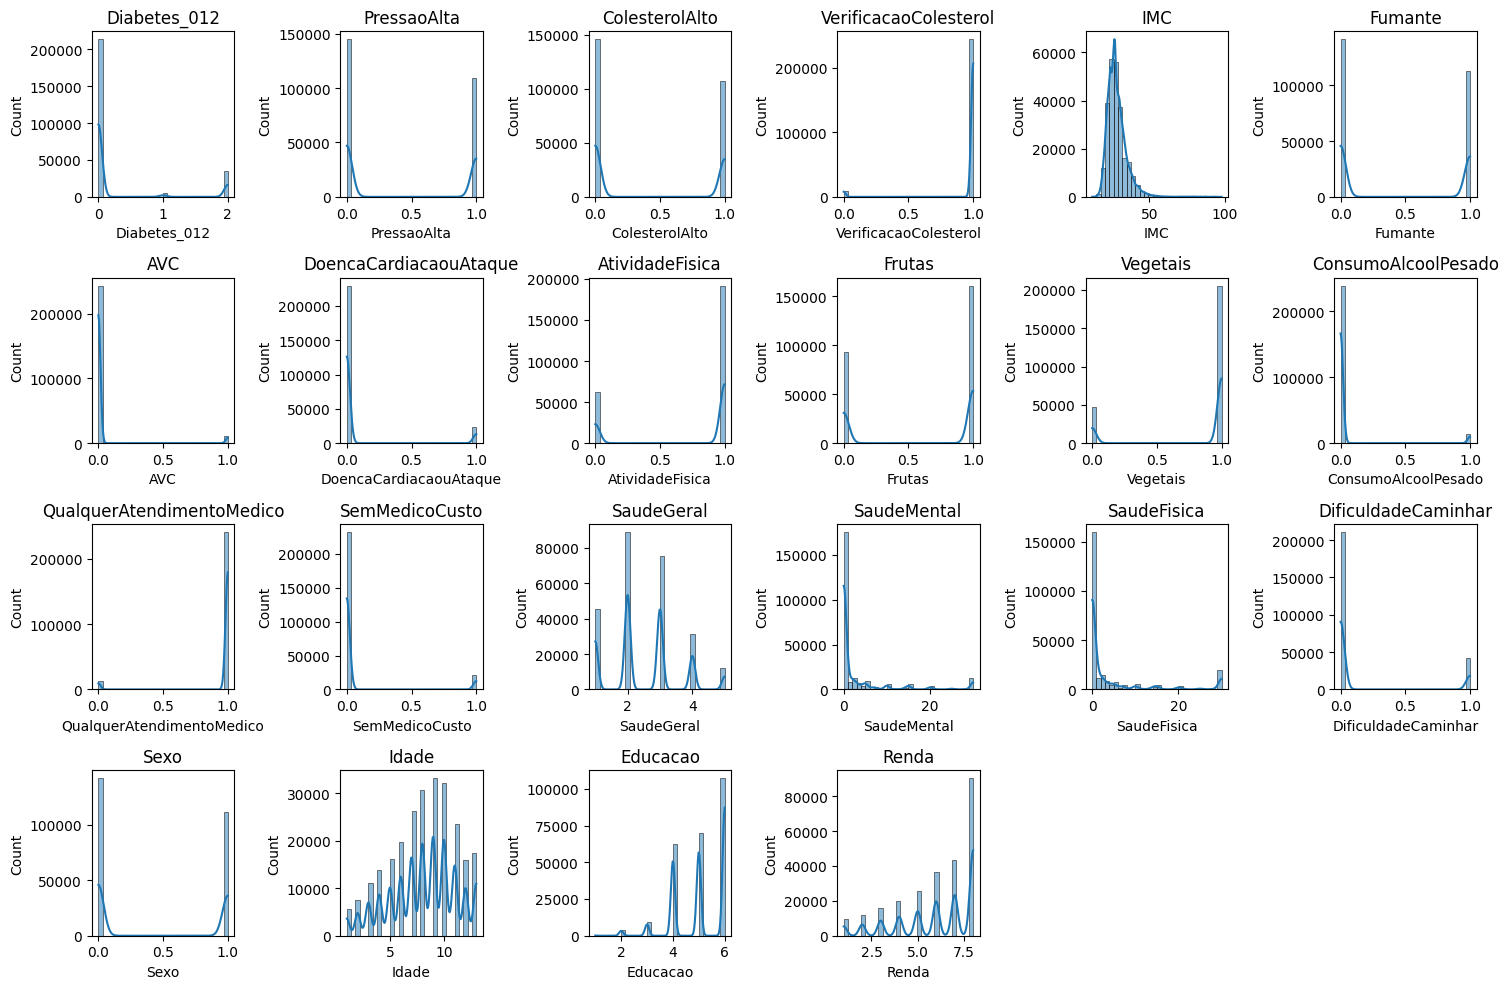

In [ ]:
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(nomes_colunas):
    plt.subplot(4, 6, i + 1)
    sns.histplot(diabetes[coluna], bins=30, kde=True)
    plt.title(coluna)
plt.tight_layout()
plt.show()

Por meio da distribuição dos histogramas, conseguimos comparar como diferentes variáveis se distribuem.

Por meio delas, também conseguimos notar como os dados que são numéricos, se diferenciam dos categóricos dentro das tabelas.

**Relação entre a Idade e o IMC**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


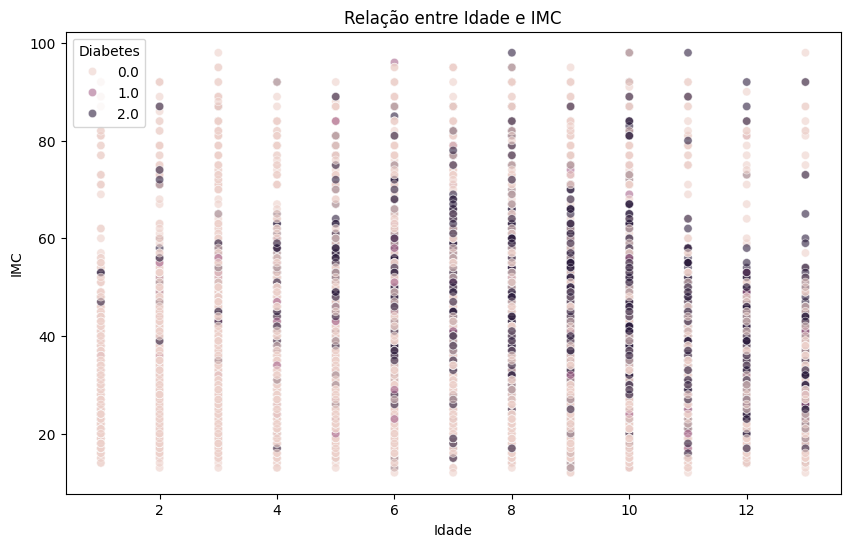

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='Idade', y='IMC', hue='Diabetes_012', alpha=0.6)
plt.title('Relação entre Idade e IMC')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.legend(title='Diabetes')
plt.show()

Através deste gráfico conseguimos ver o quanto pessoas com um nível de IMC maior do que 30 e com idades acima de 45 anos, correm mais risco de terem diabetes.

**Como idade esta separada:**

1 = 18-24     

2 = 25-29

3 = 30-34

4 = 35-39

5 = 40-44

6 = 45-49

7 = 50-54

8 = 55-59

9 = 60-64

10 = 65-69

11 = 70-74

12 = 75-79

13 = 80+

**A idade está dividida da mesma forma para todos os gráficos.**

**Inter-relacionamento das variáveis**

**Distribuição de Idade e Sexo em relação ao Diabetes**

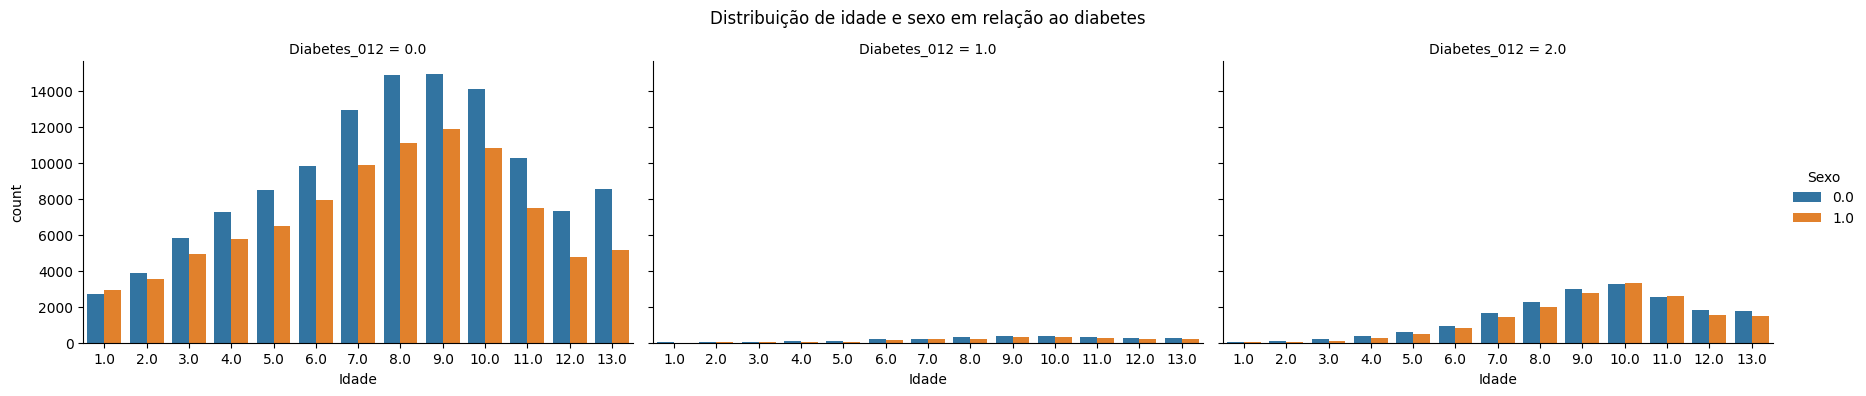

In [ ]:
# Criando os gráficos
sns.catplot(data=diabetes, x='Idade', hue='Sexo', col='Diabetes_012', kind='count', height=4, aspect=1.5)
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribuição de idade e sexo em relação ao diabetes')

plt.show()

Podemos ver nesta tabela, que o número de pessoas sem diabetes é muito maior do que o número de pessoas com pré-diabetes ou já com diabetes.

Porém, podemos ver uma incidência maior de casos de diabetes e pré-diabetes entre 50-54 á 80+.

**Importante**

Sexo 0.0 - feminino

Sexo 0.1 - masculino


**Média de Saúde Física e Mental por Diabetes**

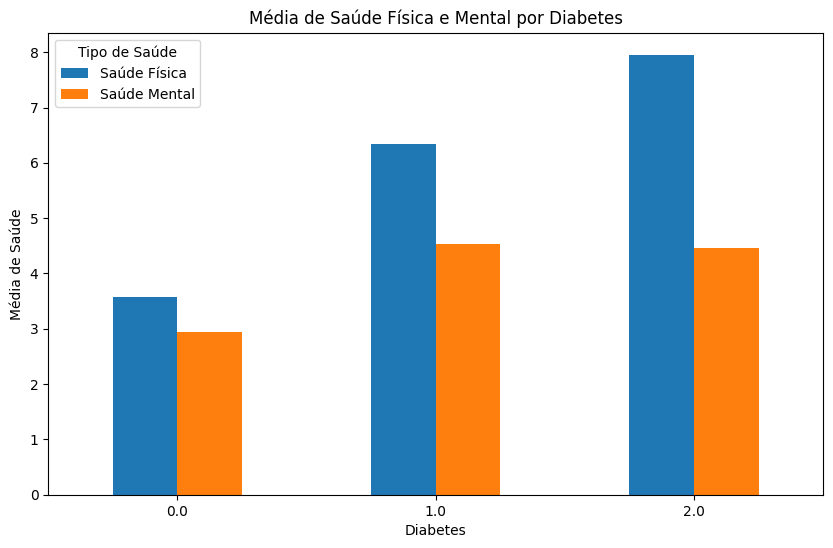

In [ ]:
mean_values = diabetes.groupby('Diabetes_012')[['SaudeFisica', 'SaudeMental']].mean().reset_index()

# Gráfico de barras
mean_values.plot(x='Diabetes_012', kind='bar', figsize=(10, 6))
plt.title('Média de Saúde Física e Mental por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Média de Saúde')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Saúde', labels=['Saúde Física', 'Saúde Mental'])
plt.show()

Neste caso, quanto maior a média, mais tempo gasto com saúde foi tido, tanto físico quanto mental.

Como podemos perceber, pessoas com pré-diabetes e diabetes acabam com médias mais altas, já que precisam de mais cuidados médicos.

Já em relação a saúde mental podemos ver os mesmos resultados, porém, com uma diferença pequena entre a média de pessoas com pré-diabetes e diabetes.

**Quantidade de fumantes por tipo de Diabetes**

In [ ]:
# Conta a quantidade de fumantes por tipo de diabetes
fumantes_por_diabetes = diabetes.groupby('Diabetes_012')['Fumante'].value_counts()

print(fumantes_por_diabetes)

Diabetes_012  Fumante
0.0           0.0        121879
              1.0         91824
1.0           0.0          2349
              1.0          2282
2.0           1.0         18317
              0.0         17029
Name: count, dtype: int64


**Comparação entre Diabetes e Fumantes**

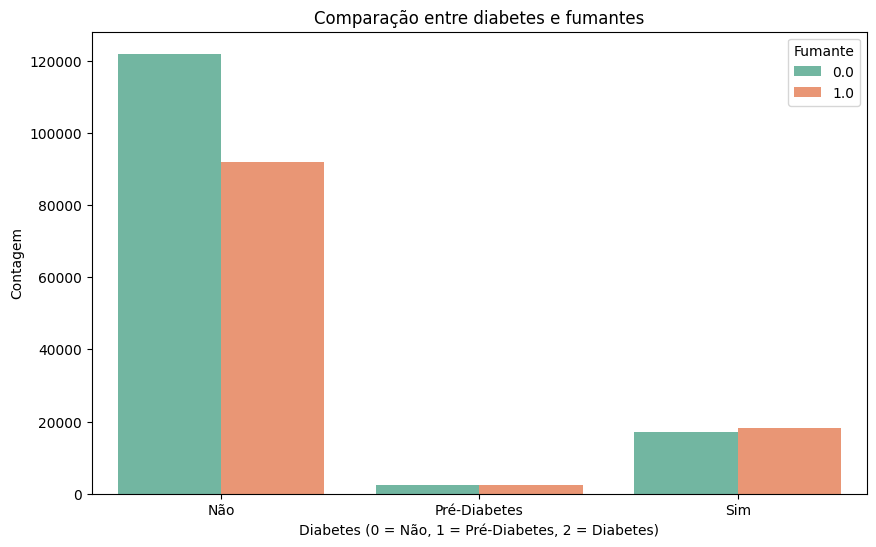

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', hue='Fumante', data=diabetes, palette="Set2")
plt.title('Comparação entre diabetes e fumantes')
plt.xlabel('Diabetes (0 = Não, 1 = Pré-Diabetes, 2 = Diabetes)')
plt.ylabel('Contagem')

# Garantir que todas as categorias sejam exibidas
plt.xticks([0, 1, 2], ['Não', 'Pré-Diabetes', 'Sim'])

plt.show()

Aqui, nós podemos ver que o número de pessoas com diabetes e pré-diabetes que dizem já er fumado ao menos 100 cigarros em toda a sua vida é maior em pessoas com  diabetes e praticamente a mesma em pessoas com pré-diabetes.

**Importante**

Fumante 0.0 - não

Fumante 0.1 - sim



**Regressão Linear: Diabetes em relação à Idade**

**Gráfico de Regressão Linear**

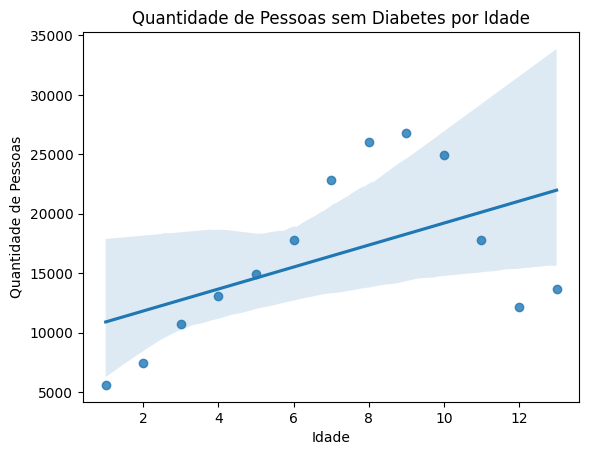

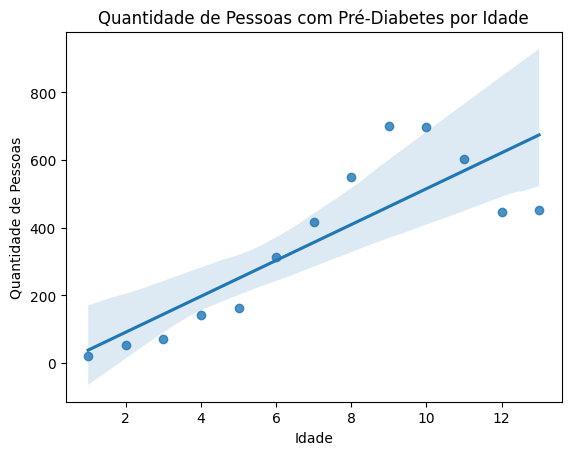

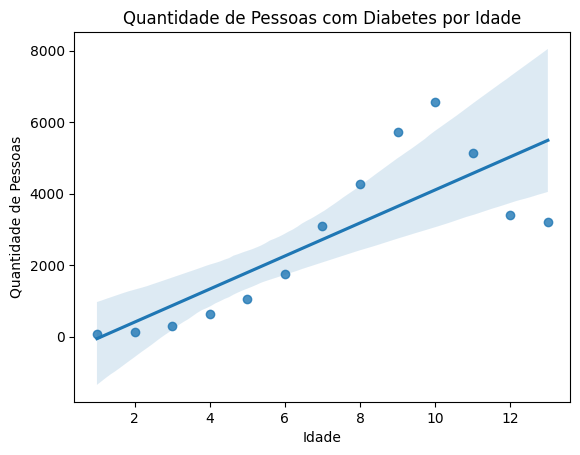

In [26]:
contagem_diabetes = diabetes[diabetes['Diabetes_012'] == 0].groupby('Idade').size().reset_index(name='Contagem')

# Gráfico de regressão linear
sns.regplot(data=contagem_diabetes, x='Idade', y='Contagem', marker='o')
plt.title('Quantidade de Pessoas sem Diabetes por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()

contagem_diabetes_1 = diabetes[diabetes['Diabetes_012'] == 1].groupby('Idade').size().reset_index(name='Contagem')

# Gráfico de regressão linear
sns.regplot(data=contagem_diabetes_1, x='Idade', y='Contagem', marker='o')
plt.title('Quantidade de Pessoas com Pré-Diabetes por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()

contagem_diabetes_2 = diabetes[diabetes['Diabetes_012'] == 2].groupby('Idade').size().reset_index(name='Contagem')

# Gráfico de regressão linear
sns.regplot(data=contagem_diabetes_2, x='Idade', y='Contagem', marker='o')
plt.title('Quantidade de Pessoas com Diabetes por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()

Podemos notar uma linha de regrassão ascendente o que indica que, conforme a idade aumenta, o número de pessoas com diabetes também aumenta.

## Testes de Hipóteses


**Teste t**

In [ ]:
# Separar os grupos ( 2 - diabetes e 0 - sem diabetes)
grupo_diabetes = diabetes[diabetes['Diabetes_012'] == 2]['IMC']
grupo_sem_diabetes = diabetes[diabetes['Diabetes_012'] == 0]['IMC']

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(grupo_diabetes, grupo_sem_diabetes)

print(f"Estatística t: {t_stat}, Valor p: {p_value}")

Estatística t: 113.81382298039709, Valor p: 0.0


**Gráfico de barras que mostra a média do IMC para diabetes**

   Diabetes_012        IMC
0           0.0  27.742521
1           1.0  30.724466
2           2.0  31.944011


<ipython-input-51-084972b9666d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_imc, x='Diabetes_012', y='IMC', palette='Set1')


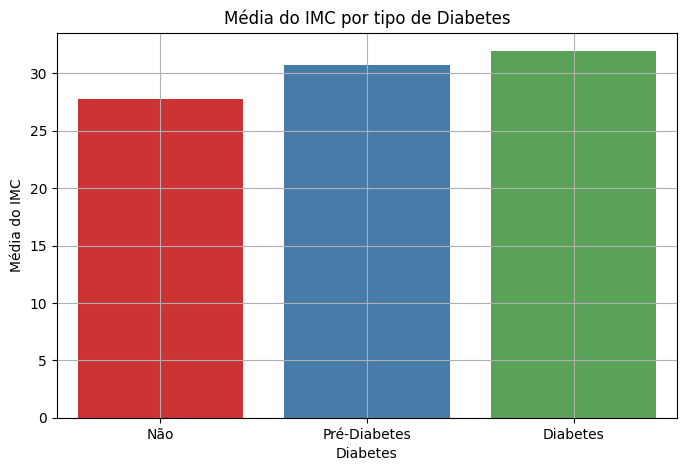

In [ ]:
media_imc = diabetes.groupby('Diabetes_012')['IMC'].mean().reset_index()
print(media_imc)

# Criar um gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=media_imc, x='Diabetes_012', y='IMC', palette='Set1')
plt.title('Média do IMC por tipo de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Média do IMC')
plt.xticks([0, 1, 2], ['Não', 'Pré-Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()

Por meio destes resultados (teste t e gráfico), podemos ver que há uma diferença significativa entre o IMC das pessoas com e sem diabetes. Isso significa que o IMC pode influênciar de alguma forma, no desenvolvimento da diabetes.

**Análise de Variância**

In [ ]:
# Agrupar os dados por nível de atividade física
grupo_atividade = [group['IMC'].values for name, group in diabetes.groupby('AtividadeFisica')]

# Análise de variância
f_stat, p_value = stats.f_oneway(*grupo_atividade)

print(f"Estatística F: {f_stat}, Valor p: {p_value}")

Estatística F: 5625.701277891358, Valor p: 0.0


Através desta análise de variância, podemos destacar que a hipótese não é nula, ou seja, há uma diferença significativa entre as médias do IMC e os diferentes níveis de atividade física.



## Conclusão


A análise revela que a presença de diabetes está associada a condições de saúde como hipertensão e colesterol alto, além de um índice de massa corporal elevado. Indivíduos com diabetes tendem a relatar uma saúde geral pior, refletindo os impactos negativos da doença. Por outro lado, a prática de atividade física parece estar relacionada a uma melhor saúde geral e a um menor índice de massa corporal. Além disso, a idade é um fator importante, com um aumento significativo na probabilidade de desenvolver hipertensão conforme os anos passam. Fatores como sexo e tabagismo parecem ter pouca influência nesse contexto, sugerindo que a atenção deve ser dada principalmente a condições interligadas ao diabetes e ao estilo de vida.

Por isso, é importante o cuidado com a saúde (mental e física) para uma melhor qualidade de vida, evitando assim problemas futuros, como a diabetes.